[//]: # (Image References)

[image1]: ./images/skin_disease_classes.png "Skin Disease Classes"
[image2]: ./images/cat_1.jpeg "Category 1 Rankings"
[image3]: ./images/cat_2.jpeg "Category 2 Rankings"
[image4]: ./images/cat_3.png "Category 3 Rankings"
[image5]: ./images/sample_ROC_curve.png "Sample ROC curve"
[image6]: ./images/sample_confusion_matrix.png "Sample confusion matrix"

# Dermatologist AI

## Introduction

In this mini project, you will design an algorithm that can visually diagnose [melanoma](http://www.skincancer.org/skin-cancer-information/melanoma), the deadliest form of skin cancer.  In particular, your algorithm will distinguish this malignant skin tumor from two types of benign lesions ([nevi](http://missinglink.ucsf.edu/lm/dermatologyglossary/nevus.html) and [seborrheic keratoses](https://www.aad.org/public/diseases/bumps-and-growths/seborrheic-keratoses)). 

The data and objective are pulled from the [2017 ISIC Challenge on Skin Lesion Analysis Towards Melanoma Detection](https://challenge.kitware.com/#challenge/583f126bcad3a51cc66c8d9a).  As part of the challenge, participants were tasked to design an algorithm to diagnose skin lesion images as one of three different skin diseases (melanoma, nevus, or seborrheic keratosis).  In this project, you will create a model to generate your own predictions.

![Skin Disease Classes][image1]

## Getting Started

1. Clone the [repository](https://github.com/udacity/dermatologist-ai) and create a `data/` folder to hold the dataset of skin images.  
```text
git clone https://github.com/udacity/dermatologist-ai.git
mkdir data; cd data
```
2. Create folders to hold the training, validation, and test images.
```text
mkdir train; mkdir valid; mkdir test
```
3. Download and unzip the [training data](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip) (5.3 GB).

4. Download and unzip the [validation data](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip) (824.5 MB).

5. Download and unzip the [test data](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip) (5.1 GB).

6. Place the training, validation, and test images in the `data/` folder, at `data/train/`, `data/valid/`, and `data/test/`, respectively.  Each folder should contain three sub-folders (`melanoma/`, `nevus/`, `seborrheic_keratosis/`), each containing representative images from one of the three image classes.

You are free to use any coding environment of your choice to solve this mini project!  In order to rank your results, you need only use a pipeline that culminates in a CSV file containing your test predictions.

## Create a Model

Use the training and validation data to train a model that can distinguish between the three different image classes.  (_After training, you will use the test images to gauge the performance of your model._)

If you would like to read more about some of the algorithms that were successful in this competition, please read [this article](https://arxiv.org/pdf/1710.05006.pdf) that discusses some of the best approaches.  A few of the corresponding research papers appear below.
- Matsunaga K, Hamada A, Minagawa A, Koga H. [“Image Classification of Melanoma, Nevus and Seborrheic Keratosis by Deep Neural Network Ensemble”](https://arxiv.org/ftp/arxiv/papers/1703/1703.03108.pdf). International Skin Imaging Collaboration (ISIC) 2017 Challenge at the International Symposium on Biomedical Imaging (ISBI). 
- Daz IG. [“Incorporating the Knowledge of Dermatologists to Convolutional Neural Networks for the Diagnosis of Skin Lesions”](https://arxiv.org/pdf/1703.01976.pdf). International Skin Imaging Collaboration (ISIC) 2017 Challenge at the International Symposium on Biomedical Imaging (ISBI). ([**github**](https://github.com/igondia/matconvnet-dermoscopy))
- Menegola A, Tavares J, Fornaciali M, Li LT, Avila S, Valle E. [“RECOD Titans at ISIC Challenge 2017”](https://arxiv.org/abs/1703.04819). International Skin Imaging Collaboration (ISIC)  2017 Challenge at the International Symposium on Biomedical Imaging (ISBI). ([**github**](https://github.com/learningtitans/isbi2017-part3))

While the original challenge provided additional data (such as the gender and age of the patients), we only provide the image data to you.  If you would like to download this additional patient data, you may do so at the competition [website](https://challenge.kitware.com/#phase/5840f53ccad3a51cc66c8dab).

All three of the above teams increased the number of images in the training set with additional data sources.  If you'd like to expand your training set, you are encouraged to begin with the [ISIC Archive](https://isic-archive.com/#images).

## Evaluation

Inspired by the ISIC challenge, your algorithm will be ranked according to three separate categories.

#### Category 1: ROC AUC for Melanoma Classification

In the first category, we will gauge the ability of your CNN to distinguish between malignant melanoma and the benign skin lesions (nevus, seborrheic keratosis) by calculating the area under the receiver operating characteristic curve ([ROC AUC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)) corresponding to this binary classification task.

If you are unfamiliar with ROC (Receiver Operating Characteristic) curves and would like to learn more, you can check out the documentation in [scikit-learn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) or read [this Wikipedia article](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

The top scores (from the ISIC competition) in this category can be found in the image below.

![Category 1 Rankings][image2]

#### Category 2: ROC AUC for Melanocytic Classification

All of the skin lesions that we will examine are caused by abnormal growth of either [melanocytes](https://en.wikipedia.org/wiki/Melanocyte) or [keratinocytes](https://en.wikipedia.org/wiki/Keratinocyte), which are two different types of epidermal skin cells.  Melanomas and nevi are derived from melanocytes, whereas seborrheic keratoses are derived from keratinocytes. 

In the second category, we will test the ability of your CNN to distinuish between melanocytic and keratinocytic skin lesions by calculating the area under the receiver operating characteristic curve ([ROC AUC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)) corresponding to this binary classification task.

The top scores in this category (from the ISIC competition) can be found in the image below.

![Category 2 Rankings][image3]

#### Category 3: Mean ROC AUC

In the third category, we will take the average of the ROC AUC values from the first two categories.

The top scores in this category (from the ISIC competition) can be found in the image below.

![Category 3 Rankings][image4]

## Getting your Results

Once you have trained your model, create a CSV file to store your test predictions.  Your file should have exactly 600 rows, each corresponding to a different test image, **plus** a header row.  You can find an example submission file (`sample_submission.csv`) in the repository.

Your file should have exactly 3 columns:
- `Id` - the file names of the test images (in the **same** order as the sample submission file)
- `task_1` - the model's predicted probability that the image (at the path in `Id`) depicts melanoma
- `task_2` - the model's predicted probability that the image (at the path in `Id`) depicts seborrheic keratosis

Once the CSV file is obtained, you will use the `get_results.py` file to score your submission.  To set up the environment to run this file, you need to create (and activate) an environment with Python 3.5 and a few pip-installable packages:
```text
conda create --name derm-ai python=3.5
source activate derm-ai
pip install -r requirements.txt
```

Once you have set up the environment, run the following command to see how the sample submission performed:
```text
python get_results.py sample_predictions.csv
```

Check the terminal output for the scores obtained in the three categories:
```text
Category 1 Score: 0.526
Category 2 Score: 0.606
Category 3 Score: 0.566
```

The corresponding **ROC curves** appear in a pop-up window, along with the **confusion matrix** corresponding to melanoma classification.  

![Sample ROC curve][image5]
![Sample confusion matrix][image6]

The code for generating the confusion matrix assumes that the threshold for classifying melanoma is set to 0.5.  To change this threshold, you need only supply an additional command-line argument when calling the `get_results.py` file.  For instance, to set the threshold at 0.4, you need only run:
```text
python get_results.py sample_predictions.csv 0.4
```

To test **your own** submission, change the code to instead include the path to **your** CSV file.


In [88]:
# data sets
from torchvision import datasets
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

num_workers = 0
batch_size = 20


normalize = transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])

randomized_transform = transforms.Compose([transforms.RandomResizedCrop(299, scale=(0.9,1.05)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomVerticalFlip(),
                                        transforms.ToTensor(),
                                        normalize])

standard_transform = transforms.Compose([transforms.Resize(299),
                                        transforms.CenterCrop(299),
                                        transforms.ToTensor(),
                                        normalize])

training_data = datasets.ImageFolder('data/train/', randomized_transform)
valid_data = datasets.ImageFolder('data/valid/', standard_transform)
test_data = datasets.ImageFolder('data/test/', standard_transform)
classes = training_data.classes

print(f"training data size: {len(training_data)}")
print(f"validation data size: {len(valid_data)}")
print(f"test data size: {len(test_data)}")
print(f"classes: {len(classes)}")

training data size: 2000
validation data size: 150
test data size: 600
classes: 3


In [89]:
# data loaders
import torch.utils.data as data
batch_size = 20

train_loader = data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_loader = data.DataLoader(valid_data, batch_size=batch_size)
test_loader = data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

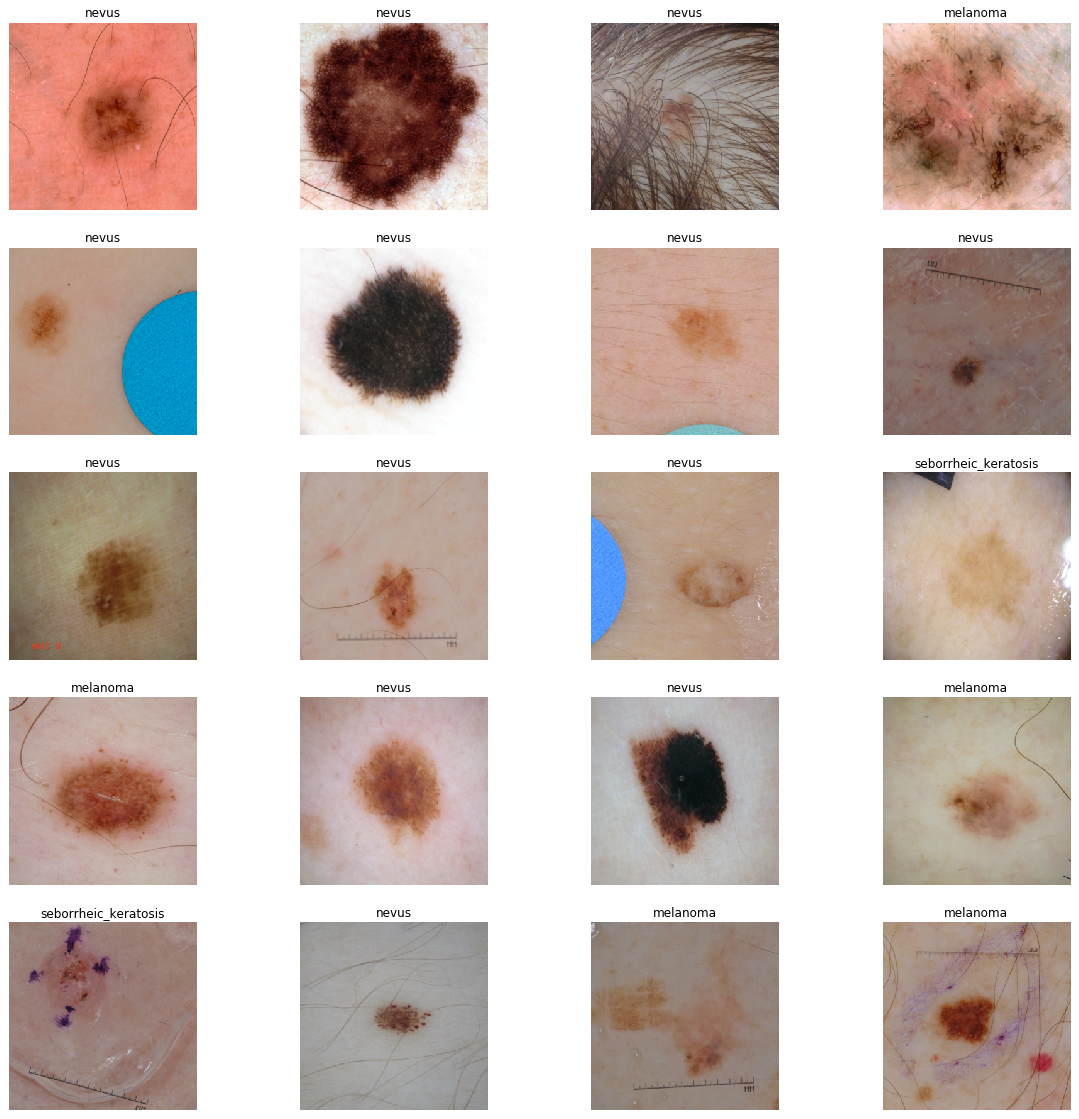

In [90]:
# sample training images
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    
    if (title):
        ax.set_title(title)
    
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

dataiter = iter(train_loader)
images, labels = dataiter.next()
# images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 20))
for idx in np.arange(20):
    ax = fig.add_subplot(5, 20/5, idx+1, xticks=[], yticks=[])
    imshow(images[idx], title=classes[labels[idx]], ax=ax)

In [102]:
# model architecture
import torch.nn as nn
import torchvision.models as models
import torch.cuda as cuda

# check if CUDA is available
use_cuda = cuda.is_available()

model = models.inception_v3(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

# inspect pretrained model
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [103]:
# add own output layer
model.fc = nn.Linear(2048, len(classes))

if use_cuda:
    model_transfer = model_transfer.cuda()

# inspect updated model
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [104]:
# Loss function and Optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), momentum=0.8, lr=0.001)

In [109]:
# training implementation
def train(n_epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output[0], target) # modified output => output[0] as inception return 2 outputs
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            print('training batch {}, loss {:.6f}'.format(batch_idx, train_loss), end='\r')
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target) # modified output => output[0] as inception return 2 outputs
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            print('validation batch {}, loss {:.6f}'.format(batch_idx, valid_loss), end='\r')
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [110]:
# execute training
n_epochs = 35

model = train(n_epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, 'model_state.pt')

Epoch: 1 	Training Loss: 0.753428 	Validation Loss: 0.999256
Validation loss decreased (inf --> 0.999256).  Saving model ...
Epoch: 2 	Training Loss: 0.731911 	Validation Loss: 0.992701
Validation loss decreased (0.999256 --> 0.992701).  Saving model ...
Epoch: 3 	Training Loss: 0.721268 	Validation Loss: 1.005959
Epoch: 4 	Training Loss: 0.706605 	Validation Loss: 0.931000
Validation loss decreased (0.992701 --> 0.931000).  Saving model ...
Epoch: 5 	Training Loss: 0.698831 	Validation Loss: 0.987330
Epoch: 6 	Training Loss: 0.693860 	Validation Loss: 0.951392
Epoch: 7 	Training Loss: 0.694786 	Validation Loss: 0.930992
Validation loss decreased (0.931000 --> 0.930992).  Saving model ...
Epoch: 8 	Training Loss: 0.680556 	Validation Loss: 0.964020
Epoch: 9 	Training Loss: 0.682174 	Validation Loss: 0.931945
Epoch: 10 	Training Loss: 0.672399 	Validation Loss: 0.987381
Epoch: 11 	Training Loss: 0.680098 	Validation Loss: 0.913652
Validation loss decreased (0.930992 --> 0.913652).  Savi

In [111]:
# load saved model
model.load_state_dict(torch.load('model_state.pt', map_location=lambda storage, loc: storage))

In [116]:
# test implementation
def test(test_loader, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(test_loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        print('test batch {}, loss {:.6f}'.format(batch_idx, test_loss), end='\r')
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [117]:
# execute test
test(test_loader, model, criterion, use_cuda)

Test Loss: 0.755135 0.755135


Test Accuracy: 68% (411/600)


<Figure size 432x288 with 0 Axes>

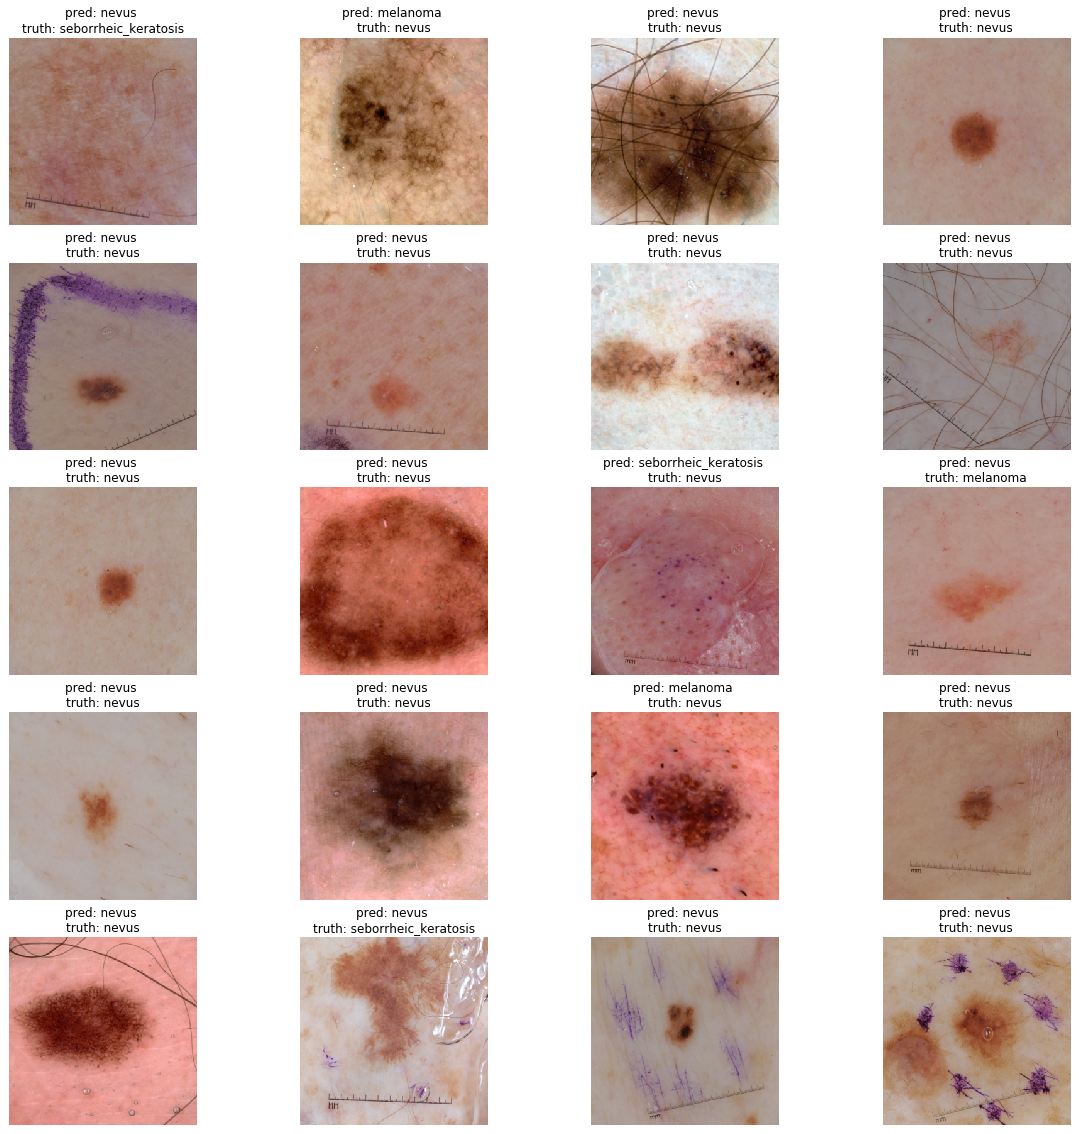

In [118]:
# display test sample
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# plt.rcParams.update({'figure.max_open_warning': 0})
plt.clf()


# move model inputs to cuda, if GPU available
if use_cuda:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(20, 20))
for idx in np.arange(20):
    ax = fig.add_subplot(5, 20/5, idx+1, xticks=[], yticks=[])
    title = "pred: {} \ntruth: {}".format(classes[preds[idx]], classes[labels[idx]])
    imshow(images[idx].cpu(), title=title, ax=ax)